In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout

# Load the cleaned dataset
df = pd.read_csv('cleaned_iot_dataset.csv', index_col='id')

In [2]:
# Split the dataset into input and output variables
X = df.drop(['time', 'Temperature', 'Humidity'], axis=1)
y = df[['Temperature']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Reshape input data to 3D tensor
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)


In [4]:
# Define the CNN architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

In [5]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
21351/21351 [==============================] - 62s 3ms/step - loss: 1.0377 - val_loss: 0.5562
Epoch 2/10
21351/21351 [==============================] - 61s 3ms/step - loss: 0.5548 - val_loss: 0.4389
Epoch 3/10
21351/21351 [==============================] - 64s 3ms/step - loss: 0.5157 - val_loss: 0.3889
Epoch 4/10
21351/21351 [==============================] - 63s 3ms/step - loss: 0.4866 - val_loss: 0.3874
Epoch 5/10
21351/21351 [==============================] - 63s 3ms/step - loss: 0.4574 - val_loss: 0.3290
Epoch 6/10
21351/21351 [==============================] - 63s 3ms/step - loss: 0.4430 - val_loss: 0.3388
Epoch 7/10
21351/21351 [==============================] - 63s 3ms/step - loss: 0.4259 - val_loss: 0.3517
Epoch 8/10
21351/21351 [==============================] - 64s 3ms/step - loss: 0.4166 - val_loss: 0.3494
Epoch 9/10
21351/21351 [==============================] - 63s 3ms/step - loss: 0.4062 - val_loss: 0.2924
Epoch 10/10
21351/21351 [==============================

In [12]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) of the predictions
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)


5338/5338 [==============================] - 7s 1ms/step
Mean Squared Error (MSE): 0.31669689989286737


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Calculate MAE, RMSE, and R-squared
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Coefficient of Determination (R-squared):", r2)

5338/5338 [==============================] - 7s 1ms/step
Mean Absolute Error (MAE): 0.42027771376414624
Root Mean Squared Error (RMSE): 0.5627582961564115
Coefficient of Determination (R-squared): 0.5829552954684853


5338/5338 [==============================] - 8s 1ms/step - loss: 0.3167


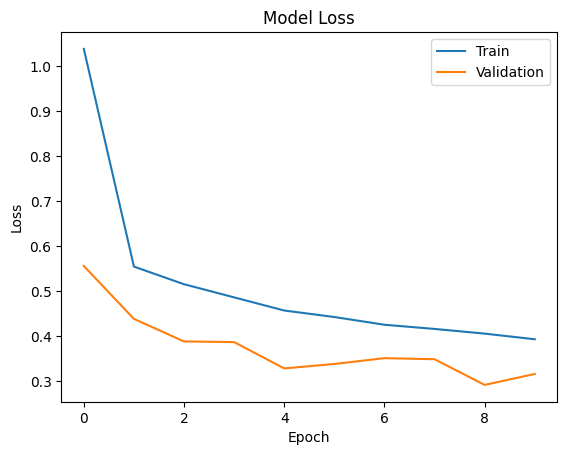

In [17]:
import matplotlib.pyplot as plt


# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

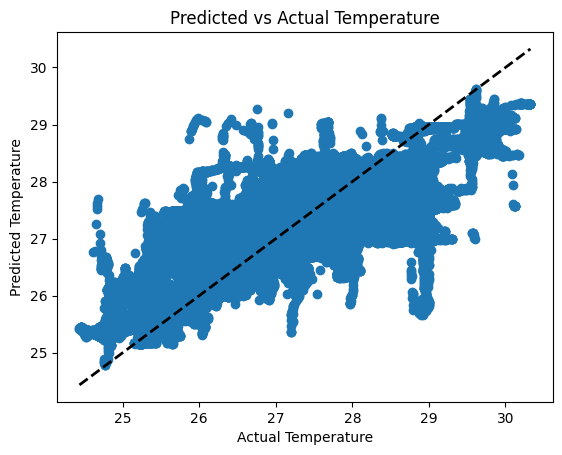

In [20]:
import matplotlib.pyplot as plt

# Plot the predicted vs actual temperature values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Predicted vs Actual Temperature')
plt.show()


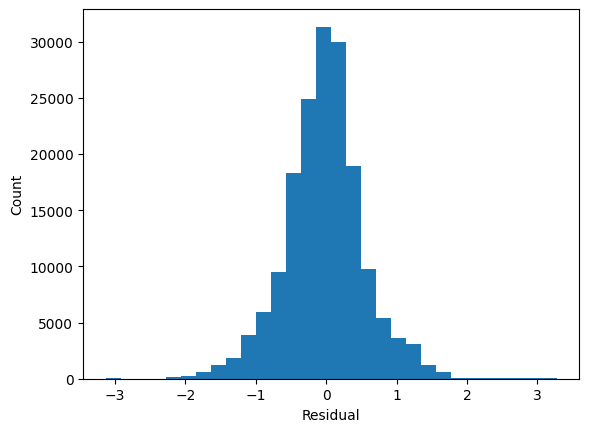

In [19]:
'''  
check the distribution of the residuals (the difference between actual and predicted values):
'''

residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


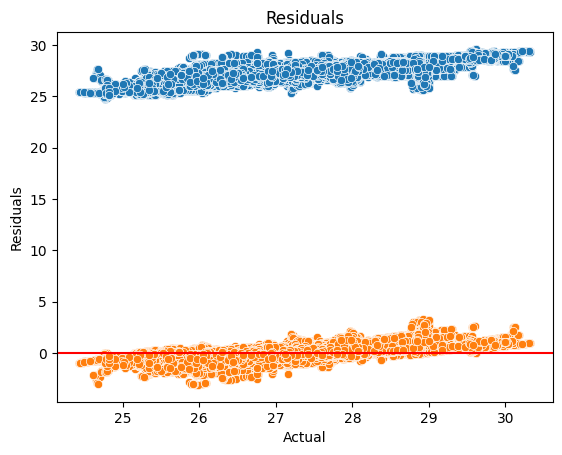

In [22]:
'''
This code will create two scatter plots, one showing the actual versus predicted values of the target variable, 
and the other showing the residuals. The red line in the residuals plot represents the zero residual line, and if the 
residuals are randomly scattered around this line, it indicates that the model is doing a good job of predicting the 
target variable.
'''

import seaborn as sns

# Plot actual vs predicted values
sns.scatterplot(x=y_test.values.reshape(-1), y=y_pred.reshape(-1))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')

# Plot residuals
residuals = y_test.values.reshape(-1) - y_pred.reshape(-1)
sns.scatterplot(x=y_test.values.reshape(-1), y=residuals)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()